In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
#Obtencion dataset.
fashionMnist=keras.datasets.fashion_mnist

#Obtencion conjuntos entrenamiento y test.
(trainImgs, trainLbls), (testImgs, testLbls) = fashionMnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
trainImgs.shape

(60000, 28, 28)

In [6]:
len(trainLbls)

60000

In [7]:
trainLbls

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
testImgs.shape

(10000, 28, 28)

In [9]:
len(testLbls)

10000

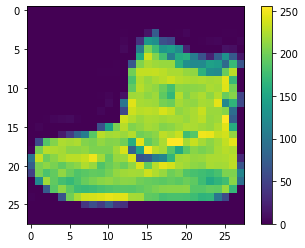

In [10]:
plt.figure()
plt.imshow(trainImgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
trainImgs = trainImgs/255.0

testImgs = testImgs/255.0

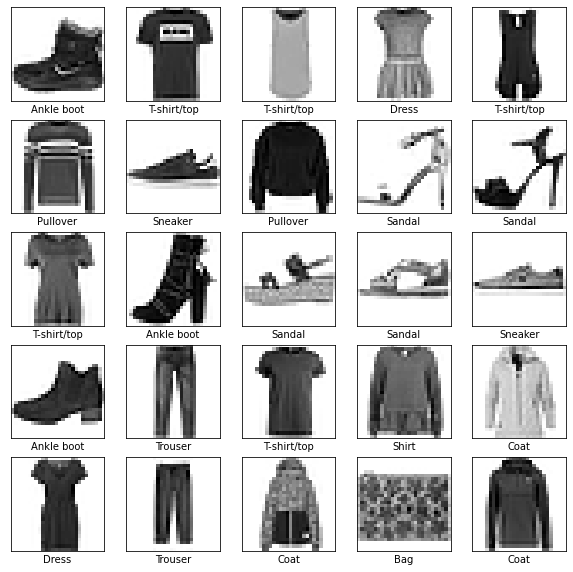

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImgs[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLbls[i]])
plt.show()

In [13]:
#Construccion modelo.
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    #Flatten => Array BiDi en Array MonoDi
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')                  
])

In [14]:
#Compilacion modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Model train
model.fit(trainImgs, trainLbls, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4981 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3168 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2962 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2844 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2713 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2505 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [16]:
#Evaluar exactitud
testLoss, testAcc=model.evaluate(testImgs, testLbls, verbose=2)
print('\nTest acc:',testAcc)

313/313 - 1s - loss: 0.3351 - accuracy: 0.8818

Test acc: 0.8817999958992004


In [17]:
#Predicciones
predictions=model.predict(testImgs)

In [18]:
predictions[0]

array([1.8542877e-08, 1.3544327e-09, 1.7525831e-08, 3.4691322e-08,
       1.3365853e-07, 2.1793270e-03, 3.9358247e-06, 1.7050397e-02,
       7.0842310e-07, 9.8076540e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
testLbls[0]

9

In [21]:
def plotImg(i, predictionsArray, trueLbl, img):
  predictionsArray, trueLbl, img=predictionsArray, trueLbl[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predictedLbl=np.argmax(predictionsArray)
  color='blue' if predictedLbl==trueLbl else 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLbl],
                                       100*np.max(predictionsArray),
                                       classNames[trueLbl]),
                                       color=color)
  
def plotValueArray(i, predictionsArray, trueLbl):
  predictionsArray, trueLbl=predictionsArray, trueLbl[i]
  plt.grid(False)    
  plt.xticks(range(10))
  plt.yticks([])
  thisPlt=plt.bar(range(10), predictionsArray, color="#777777")
  plt.ylim([0,1])
  predictedLbl=np.argmax(predictionsArray)

  thisPlt[predictedLbl].set_color('red')
  thisPlt[trueLbl].set_color('blue')

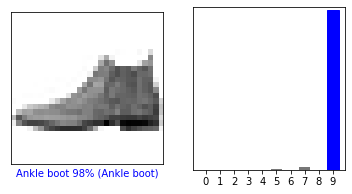

In [22]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImg(i,predictions[i], testLbls, testImgs)
plt.subplot(1,2,2)
plotValueArray(i, predictions[i], testLbls)
plt.show()

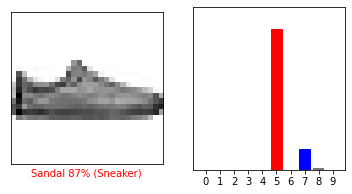

In [23]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImg(i,predictions[i], testLbls, testImgs)
plt.subplot(1,2,2)
plotValueArray(i, predictions[i], testLbls)
plt.show()

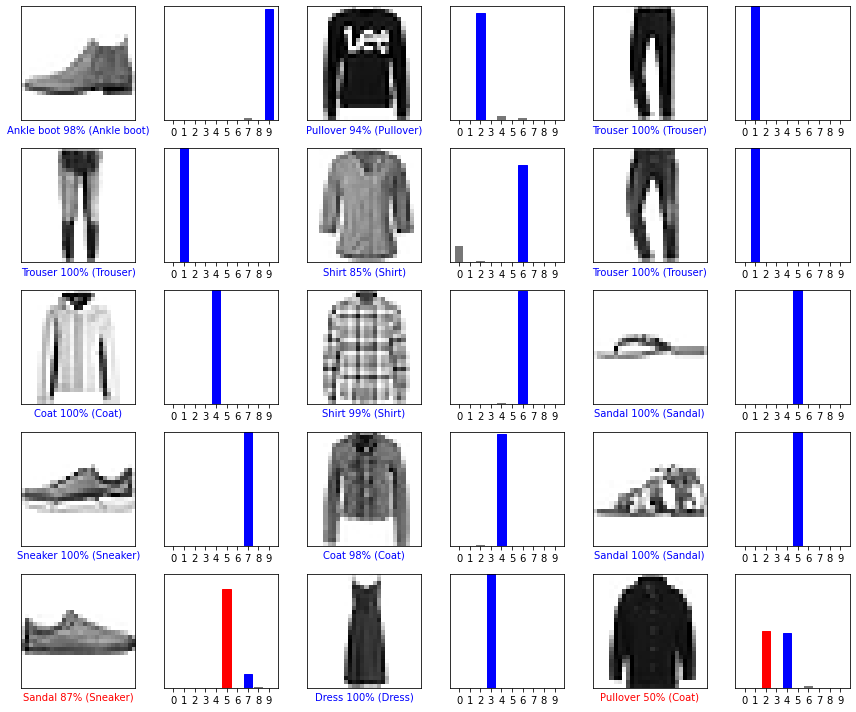

In [24]:
rows=5
cols=3
numImgs=rows*cols
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(numImgs):
  plt.subplot(rows, 2*cols, 2*i+1)
  plotImg(i, predictions[i], testLbls, testImgs)
  plt.subplot(rows, 2*cols, 2*i+2)
  plotValueArray(i, predictions[i], testLbls)
  plt.tight_layout()
plt.show()

In [25]:
img=testImgs[1]
print(img.shape)

(28, 28)


In [26]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predSingle=model.predict(img)
print(predSingle)

[[4.3306348e-04 1.3667661e-13 9.4302130e-01 4.5259596e-09 3.8998026e-02
  3.4438100e-10 1.7547602e-02 1.9087641e-18 1.4525943e-09 1.3443084e-14]]


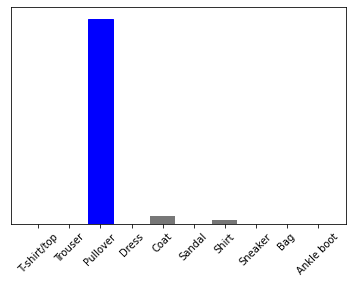

In [28]:
plotValueArray(1, predSingle[0], testLbls)
_=plt.xticks(range(10), classNames, rotation=45)

In [29]:
np.argmax(predSingle[0])

2